# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation

## Contexte
- Pour notre projet de recherche sur une plateforme de classification d'articles textuels, d'actualité en français 
- Un jeu de données de qualité, et en quantité suffisante, est nécessaire.


- Nous n'avons pas trouvé de jeu de données pertinent.
- Nous avons travaillé 6 mois pour en constituer un jeu de données


- Cette expérience nous confirme qu'il est suffisant pour avancer
- Et qu'on peut espérer de bonnes prédictions avec des algoritmes de machine learning supervisés


---


## Contexte, Environnement et Observations
---

### Technologies utilisées

Un environnement à l'état de l'art
- *python 3.9.13* - https://www.python.org/
- *jupyter notebook* - https://jupyter.org/
- *pandas* - https://pandas.pydata.org/
- *scikit-learn* - hhttps://scikit-learn.org/stable/index.html

Et la plateforme que nous developons dans le cadre du projet
- *patat* - https://github.com/fmaine/patat

### Initialisations

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd

### Chargement des données

Le dataset est composé :
- De textes d'environ 87000 articles d'actualité en français
- De labelisation sur une 20aie de labels d'un sous ensemble de 455 de ces articles



#### Articles

In [4]:
article_filename = ''

In [5]:
import patat.db.article_db

article_db = patat.db.article_db.ArticleDb(article_filename)

article_db.df()

,url,title,article,site,author,date_iso,url_h,c_count
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,reseauinternational.net,NaN,2022-09-30T00:00:00,f95a294c94ff76cc9626ae06300a8b38067f89cf,10366.0
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...",reseauinternational.net,NaN,2022-09-30T00:00:00,c924dab7ded47578d81c3ae46f8be0964b3c50f1,1607.0
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,lemediaen442.fr,NaN,2022-09-29T00:00:00,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb,1444.0
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",www.francesoir.fr,Auteur(s)\nFranceSoir,2022-09-28T13:15:00,0c0341a1f5fae820ee307cb54024df6b06a93d85,4040.0
4,https://www.breizh-info.com/2022/09/27/208410/...,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...",www.breizh-info.com,NaN,2022-09-27T00:00:00,fcce819327d0302c4cf5e3a8a43b54327ffb8e63,1145.0
...,...,...,...,...,...,...,...,...
77906,https://www.lelibrepenseur.org/une-histoire-vi...,Une histoire vieille comme le monde !,Certains veulent des preuves ! Ils ont raison....,www.lelibrepenseur.org,Par\nAdmin,2010-05-04T00:00:00,8c7a6ecf46d47da1912884a0c0a2837c69f7ad19,NaN
77907,https://www.lelibrepenseur.org/actus/,Actus,"Dernière vidéo !\nIl était temps, enfin ! Je v...",www.lelibrepenseur.org,Par\nuser,2007-07-07T00:00:00,d4d5a37a8ff545664bea75664c8d8695e70d0941,NaN
77908,https://www.lelibrepenseur.org/affiche-des-dec...,Affiche des décès et malaises de sportifs de h...,Un nombre inquiétant de sportifs de haut nivea...,www.lelibrepenseur.org,NaN,NaN,a175027896cf79e76dfad6409694fafacf1919b3,NaN
77909,https://www.lelibrepenseur.org/communaute/,Communauté,Notre Réseau Telegram et ses Groupes Secondair...,www.lelibrepenseur.org,NaN,NaN,6ba257c7b15dd68cadf7dc5d6d8c584db0f1792e,NaN


Base d'envion 77000 articles.

On ne s'intéresse qu'aux textes des titres et du corps des articles

Exemples d'articles :

In [6]:
for index,row in article_db._df.sample(10).iterrows():
    print(f"{row['title']}\n{row['url']}\n{row['article']}")
    print('\n\n--------------------\n\n')

Les biolabs allemands en Ukraine
https://lezarceleurs.blogspot.com/2022/04/les-biolabs-allemands-en-ukraine.html
De : https://dailyexpose.uk/2022/04/18/germanys-military-biological-activity-in-ukraine/L'activité biologique militaire de l'Allemagne en Ukraine, faut-il s'inquiéter ? 
Par  Rhoda Wilson le 18 avril 2022Selon
 le Représentant permanent de la Fédération de Russie auprès de l'Office
 des Nations Unies à Genève, Gennady Gatilov, de vastes armes militaires
 biologiques dangereuses et des programmes de recherche ont été 
découverts en Ukraine.
Bon
 nombre de ces projets hautement exotiques sont financés par les 
États-Unis, dans le cadre de la Defense Threat Reduction Agency (« DTRA 
») du Pentagone. Cependant,
 d'autres programmes d'armes biologiques présumés et leurs installations
 sont également financés et dirigés par le ministère allemand des 
Affaires étrangères et les forces armées allemandes, ce qui indique que 
l'implication des membres de l'OTAN en Ukraine est beaucoup

#### labels

In [8]:
label_filename = ''

In [9]:
import patat.db.label_db

label_db = patat.db.label_db.LabelDb(label_filename)

label_db.df()

,url,value,label,owner,url_h,type
0,https://reseauinternational.net/tous-les-jeune...,0.049183,infox,221013-InfoxPred,f95a294c94ff76cc9626ae06300a8b38067f89cf,pred
1,https://reseauinternational.net/adhesion-a-la-...,0.022365,infox,221013-InfoxPred,c924dab7ded47578d81c3ae46f8be0964b3c50f1,pred
2,https://lemediaen442.fr/onu-le-premier-ministr...,0.967536,infox,221013-InfoxPred,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb,pred
3,https://www.francesoir.fr/societe-environnemen...,0.254574,infox,221013-InfoxPred,0c0341a1f5fae820ee307cb54024df6b06a93d85,pred
4,https://www.breizh-info.com/2022/09/27/208410/...,0.074594,infox,221013-InfoxPred,fcce819327d0302c4cf5e3a8a43b54327ffb8e63,pred
...,...,...,...,...,...,...
186181,https://www.profession-gendarme.com/zelensky-e...,0.556761,infox,220930-tf_lr.pp,e346761c2a99d892b26c9388480e0ee6ad6b303b,pred
186182,https://www.profession-gendarme.com/zelensky-l...,0.164531,infox,220930-tf_lr.pp,77525354644316eadab53960efa8f5fd028c7f67,pred
186183,https://www.profession-gendarme.com/zelensky-m...,0.673791,infox,220930-tf_lr.pp,fc6a074da5c02032bc9fc3f35f1044bc4029042c,pred
186184,https://www.profession-gendarme.com/zero-mort-...,0.103192,infox,220930-tf_lr.pp,e4f0a8961d79c9a5f66c80d7aa4196cb679af2b0,pred


### Mise en forme du corpus

Concaténation : text = titre + article

In [10]:
article_db.df()['text'] = article_db.df()['title'] + '\n' + article_db.df()['article']

In [11]:
df_corpus = article_db.df()

In [12]:
df_corpus.value_counts('site')

site
www.francesoir.fr              18442
www.francetvinfo.fr            14597
www.breizh-info.com             6067
www.dreuz.info                  5137
www.legorafi.fr                 4488
www.wikistrike.com              3893
www.profession-gendarme.com     3191
actu.fr                         2874
www.lelibrepenseur.org          2612
fr.sott.net                     2601
lesmoutonsrebelles.com          2172
lezarceleurs.blogspot.com       2129
lemediaen442.fr                 1873
www.cnews.fr                    1519
reseauinternational.net         1144
theconversation.com             1049
www.lesalonbeige.fr              991
lesakerfrancophone.fr            872
www.polemia.com                  621
fr.novopress.info                611
infodujour.fr                    492
lesobservateurs.ch               338
www.nouvelordremondial.cc         96
lesdeqodeurs.fr                   87
www.voltairenet.org                8
www.les-crises.fr                  5
lalettrepatriote.com             

In [13]:
df_label = label_db._df
df_recueil_label = df_label[df_label['owner']=='recueil'].pivot_table(index='url_h',values='value',columns='label')

In [14]:
df_recueil_label = df_recueil_label.reset_index()
df_recueil_label

label,url_h,cherry_picking,denigrement,entites_coherentes,entites_nommees,exageration,faits,fausse_nouvelle,infox,insinuations,...,ouverture_esprit,propos_raportes,qualite_ecriture,scientifique_sulfureux,signe,sophisme,sources_citees,titre_decale,trop_chiffres,trop_mots
0,009770d8b01c877bc11b1c3ca7c481b7ea4b1876,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,00f659a2b16dbcc63f93844489c0c3175b2a344c,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,016cb74a38bcdf27c834b76f5792264fcbadce36,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01a106ca9d80b922fc5979b57156a66a8cd46e38,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,01a787224f485ecd4cbdfd43aa53780efdaec0f4,NaN,NaN,0.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,fd7163e05b2b053b37dca2156cc8e3571027329a,NaN,NaN,1.0,1.0,NaN,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
492,fdb789f4333f4eb6f72c2f77111a3048a1a778b1,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,fee8bffbd8f2188ff0d862ebfb14b26bb9030dc5,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,ff26c53b66457a06ff73c98b765cc23158445316,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_recueil=pd.merge(article_db._df,df_recueil_label)

Cette expérience est appliquée au label infox

In [16]:
df_recueil = df_recueil[['url','text','infox']]
df_recueil

,url,text,infox
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)\np...",0.0
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,0.0
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,1.0
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,0.0
4,https://www.dreuz.info/2022/09/qui-est-elle-an...,"Qui est-elle ? Anti-UE, pro-Otan, pro-Ukraine,...",0.0
...,...,...,...
411,https://www.lelibrepenseur.org/sanna-marine-la...,"Sanna Marin, la Première ministre finlandaise,...",0.0
412,https://www.lelibrepenseur.org/manifestations-...,Manifestations importantes d’agriculteurs aux ...,1.0
413,https://www.lelibrepenseur.org/les-deces-exces...,Les décès excessifs sont en augmentation mais ...,1.0
414,https://www.lelibrepenseur.org/1-milliard-de-c...,1 milliard de Chinois touchés par un piratage ...,1.0


## Expérience 1
- Bag of Words avec `sklearn.feature_extraction.text.CountVectorizer`
- Regression logistique avec `sklearn.linear_model.LogisticRegression`

---

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_recueil['text'])

In [19]:
y = df_recueil['infox']

In [20]:
X.shape

(416, 34039)

In [21]:
y.value_counts()

0.0    208
1.0    208
Name: infox, dtype: int64

### Construction des Datasets d'entrainement et de test

In [22]:
import sklearn.model_selection

#X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,train_size=0.8,shuffle=True)
#X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,random_state=42,train_size=0.5)

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,random_state=42,train_size=0.75)

X_train.shape

(312, 34039)

### Entrainement du modele

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#classifier = LogisticRegression(C=100.0, random_state=42, solver='lbfgs', multi_class='ovr', max_iter=1000)
classifier = LogisticRegression(max_iter=1000)

# Fit the model
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Mesure des résultats

In [25]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matrice de confusion')
print(cnf_matrix)
print(f'Accuracy score {metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Recall score {metrics.recall_score(y_test, y_pred)*100:.2f}%')

Matrice de confusion
[[38 17]
 [11 38]]
Accuracy score 73.08%
Recall score 77.55%


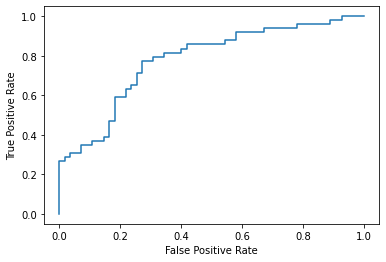

In [28]:
y_proba = classifier.predict_proba(X_test)
y_score = y_proba.transpose()[1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Expérience 2
- Suppression des mots rares et des mots communs
- Comptage en fréquence TdIdf
- Bag of Words avec `sklearn.feature_extraction.text.TdidfVectorizer` + stopwords 
- Regression logistique avec `sklearn.linear_model.LogisticRegression`

---

### Comptage Mots pour label infox

In [ ]:
import patat.ml.lex_analyser

In [ ]:
lex = patat.ml.lex_analyser.LexAnalyser()

In [ ]:
def merge_texts(texts):
    result = ''
    for text in texts:
        result = result + text + '\n'
    return result

In [ ]:
def count_words_label(df,label):
    df = df[df[label].notna()]
    df_texts = pd.pivot_table(df, values='text', index=None, columns=label, aggfunc=merge_texts)
    wc = {}
    word_analysis = {}
    for key in df_texts.keys():
        text = df_texts[key]['text']
        count_colname = label+'_'+str(int(key))
        wc[key] = lex.count_tokens(lex.get_words(text))
        for word in wc[key]:
            word_dic = word_analysis.get(word,{})
            word_dic[count_colname]=wc[key][word]
            word_analysis[word]=word_dic
    return word_analysis

In [ ]:
df = df_recueil
label = 'infox'
df_count = pd.DataFrame(count_words_label(df,'infox')).T
df_count = df_count.fillna(0)

In [ ]:
df_count

In [ ]:
df_count['words']=df_count.index

#### Identification des mots à ignorer

In [ ]:
# Mots rares

occ_rare = 3
#occ_rare = 5
def is_rare(row):
    return row['infox_0'] < occ_rare and row['infox_1'] < occ_rare

df_rare = df_count[df_count.apply(is_rare,axis=1)]

rare_words = list(df_rare.index)
len(rare_words)

In [ ]:
# Mots communs

common_size = 100
#common_size = 300
top_0 = df_count.sort_values('infox_0',ascending=False).head(common_size).index
top_1 = df_count.sort_values('infox_1',ascending=False).head(common_size).index
common_words = []
for word in top_0:
    if word in top_1:
        common_words.append(word)
len(common_words)


In [ ]:
ignore_words = common_words + rare_words
word_vocabulary = [word for word in df_count['words'] if word not in ignore_words]
print(f'Vocabulaire = Total mots - mots communs - mots rares = {len(word_vocabulary)}')

### Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words=ignore_words)
#vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_recueil['text'])

In [ ]:
y = df_recueil['infox']

In [ ]:
X.shape

In [ ]:
y.value_counts()

### Construction des Datasets d'entrainement et de test

In [ ]:
import sklearn.model_selection

#X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,train_size=0.8,shuffle=True)
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,random_state=42,train_size=0.75)
#X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,random_state=42,train_size=0.5)

X_train.shape

### Entrainement du modele

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression(C=100.0, random_state=42, solver='lbfgs', multi_class='ovr', max_iter=1000)
#classifier = LogisticRegression(max_iter=1000)

# Fit the model
classifier.fit(X_train, y_train)


### Mesure des résultats

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matrice de confusion')
print(cnf_matrix)
print(f'Accuracy score {metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Recall score {metrics.recall_score(y_test, y_pred)*100:.2f}%')

In [ ]:
y_proba = classifier.predict_proba(X_test)
y_score = y_proba.transpose()[1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Expérience 3
- Benchmark de quelques algorithmes
- sur la base des features produites à l'étape 2

---

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    LogisticRegression(C=100.0, random_state=42, solver='lbfgs', multi_class='ovr', max_iter=1000),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

#X = X.toarray()

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,random_state=42,train_size=0.75)

results =[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('------------------------------------')
    print(f'Classifier : {name}')
    print('Matrice de confusion')
    print(cnf_matrix)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(f'Accuracy score {acc*100:.2f}%')
    recall = metrics.recall_score(y_test, y_pred)
    print(f'Recall score {recall*100:.2f}%')
    results.append({
        'Classifier' : name,
        'Accuracy' : round(acc*100),
        'Recall' : round(recall*100),
    })
print('------------------------------------')

### Synthèse

In [ ]:
df = pd.DataFrame(results)
df = df.sort_values(['Accuracy','Recall'],ascending=False)
df

## Analyse des résultats et conclusions
---

- En utilisant les moyens les plus simples on arrive à un prédicteur qui a déjà des performances qui semblent intéressantes
- La précision de presque 76% des prédictions doit être validée par l'observation manuelle
- Les deux algorithmes qui sortent du lot sont Neural Network et Regression Logistique

## Prochaines Etapes
---
- Tuning de chaque algo du benchmark pour arriver à de meilleur résultats
- Continuer dans cette direction : utiliser les lemmes des textes

---

In [ ]:
from patat.util.file import pickle_save
data = { 'X':X, 'y':y }
pickle_save(data,'data/tmp/221009-Xy.p')

## Point d'étape Septembre 2022
Cette expérience :
- S'appuie sur les *données* consituées précédement par le projet
- Illustre la *démarche* de recherche sur le coeur du projet
- Montre des *résultats* préliminaires

Elle apporte des éléments de réponse aux questions :
- *Est-il possible de prévoir si un article est une infox en utilisant les solutions les plus simples ?*
- *Avons nous suffisament de données et des qualité suffisante pour avancer sur les phases suivantes ?*

Les solutions étudiées s'appuient :
- Un jeu de données de 455 articles labelisés manuellement
- Représentation des textes sous forme de *Bag Od Words*
- Machine learning supervisé : *Regression Logistique* et al.

Nous sommes au début de ce projet de recherche et notre approche est de commencer par les approches les simples, d'en mesurer les résultats, puis d'améliorer l'approche dans le but d'obtenir de meilleurs résultats.

Questions :
- Est ce qu'avec plus de données on aurait de meilleurs résultats ?